## Train your very first pyTorch Model

Let's learn through doing.

In the notebook we will create an image classifier to detect playing cards.

We will trackle this problem in 3 parts:

  1. PyTorch Dataset
  2. PyTorch Model
  3. PyTorch training loop


In [2]:
import torch
import torch.nn as nn # Import the torch.nn module
import torch.optim as optim # Define optimize later
from torch.utils.data import Dataset, DataLoader # Changed Dataloader to DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import timm #image classification

import matplotlib.pyplot as plt # for data viz
import numpy as np
import pandas as pd
import sys
import torchvision

print('System version: ', sys.version)
print('PyTorch version: ', torch.__version__)
print('Torchvision version: ', torchvision.__version__)
print('CUDA available: ', torch.cuda.is_available())
print('Numpy Version: ', np.__version__)
print('Pandas Version: ', pd.__version__)

System version:  3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]
PyTorch version:  2.6.0+cu124
Torchvision version:  0.21.0+cu124
CUDA available:  True
Numpy Version:  2.0.2
Pandas Version:  2.2.2


##Step 1: PyTorch dataset (and dataloader)

Would you learn how to bake a cake without first having the ingredients?  NO

The same things can be said for training a pytorch model without first having the dataset setup correctly

This is why datasets are important:

  . It's an organized way to structure how the data and the labels are loaded into the model.
  . We can then wrap the dataset in a dataloader and pytorch will handle batching the shuffling the data for us when training the model!
  

In [3]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("gpiosenka/cards-image-datasetclassification")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/cards-image-datasetclassification


In [4]:
#Dataset class
class PlayingCardDataset(Dataset):
  def __init__(self, data_dir, transforms =None): # Resize all the image same size
    self.data = ImageFolder(data_dir, transform = transforms)

  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx):
    return self.data[idx]

  @property
  def classes(self):
    return self.data.classes
  #Playing card dataset

In [5]:
dataset = PlayingCardDataset('/kaggle/input/cards-image-datasetclassification')

In [6]:
len(dataset)

8154

In [7]:
dataset[50]

(<PIL.Image.Image image mode=RGB size=224x224>, 0)

1


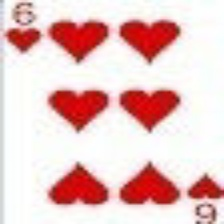

In [8]:
image, label = dataset[6000]
print(label)
image
#print(label)

In [9]:
#Get a dictionary associating target values eith folder names

data_dir = '/kaggle/input/cards-image-datasetclassification/train'
target_to_class = {v: k for k,v in ImageFolder(data_dir).class_to_idx.items()}
print(target_to_class)

{0: 'ace of clubs', 1: 'ace of diamonds', 2: 'ace of hearts', 3: 'ace of spades', 4: 'eight of clubs', 5: 'eight of diamonds', 6: 'eight of hearts', 7: 'eight of spades', 8: 'five of clubs', 9: 'five of diamonds', 10: 'five of hearts', 11: 'five of spades', 12: 'four of clubs', 13: 'four of diamonds', 14: 'four of hearts', 15: 'four of spades', 16: 'jack of clubs', 17: 'jack of diamonds', 18: 'jack of hearts', 19: 'jack of spades', 20: 'joker', 21: 'king of clubs', 22: 'king of diamonds', 23: 'king of hearts', 24: 'king of spades', 25: 'nine of clubs', 26: 'nine of diamonds', 27: 'nine of hearts', 28: 'nine of spades', 29: 'queen of clubs', 30: 'queen of diamonds', 31: 'queen of hearts', 32: 'queen of spades', 33: 'seven of clubs', 34: 'seven of diamonds', 35: 'seven of hearts', 36: 'seven of spades', 37: 'six of clubs', 38: 'six of diamonds', 39: 'six of hearts', 40: 'six of spades', 41: 'ten of clubs', 42: 'ten of diamonds', 43: 'ten of hearts', 44: 'ten of spades', 45: 'three of clu

In [10]:
#Dataset output all of these images are smae size
transforms = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor(),
    ])
data_dir = '/kaggle/input/cards-image-datasetclassification/train'
dataset = PlayingCardDataset(data_dir, transforms)

In [11]:
image, label = dataset[100]
image.shape

torch.Size([3, 128, 128])

In [12]:
#iterate over dataset
for image, label in dataset:
  break

In [13]:
label

0

##Dataloader

-Batching our dataset

In [14]:
#PyTorch dataset loader
dataloader = DataLoader(dataset, batch_size = 32, shuffle = True)

In [15]:
for images, labels in dataloader:
  break

In [16]:
images.shape, labels.shape

(torch.Size([32, 3, 128, 128]), torch.Size([32]))

In [17]:
labels

tensor([16, 17, 47,  1, 36, 40, 12, 48, 42, 20, 16, 39, 22, 41, 12, 12, 51, 22,
        52, 17, 23, 14, 36,  6, 31, 31, 15, 10, 12, 26, 10,  8])

##Step-2: Pytorch Model

PyTorch dataset have a structure way of organizing your data, pytorch models follow a similar paradigm

- We could create the model from scratch defining each layer
- However for tasks like image classification, many of the state of the art architecture are readily available and we can import them from packages like timm
- Understanding the pytorch model is all about understanding the shape the data is at each layer, and main one we need to modify for a tasks is the final layer. Here we have 52*4 targets, so we will modify the last layer for this.

In [18]:
class SimpleCardClassifier(nn.Module):
  def __init__(self, num_classes = 53): # Changed delf to self
    super(SimpleCardClassifier, self).__init__()
    #where we ddefine all parts of the model
    # Corrected model name to 'efficientnet_b0'
    self.base_model = timm.create_model('efficientnet_b0', pretrained=True)
    self.features = nn.Sequential(*list(self.base_model.children())[:-1]) # Corrected 'childern' to 'children'

    enet_out_size = 1280
    #make classifier
    self.classifier = nn.Linear(enet_out_size, num_classes)

  def forward(self, x):
    #connect these parts and retrun the output
    x = self.features(x)
    output = self.classifier(x)
    return output

In [19]:
model = SimpleCardClassifier(num_classes=53)
print(str(model)[:500])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/21.4M [00:00<?, ?B/s]

SimpleCardClassifier(
  (base_model): EfficientNet(
    (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNormAct2d(
      32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): SiLU(inplace=True)
    )
    (blocks): Sequential(
      (0): Sequential(
        (0): DepthwiseSeparableConv(
          (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=Fa


In [20]:
exaple_out = model(images)
exaple_out.shape #[batch size, num classes]

torch.Size([32, 53])

##Step 3: The training loop

- Now that we understand the general paradigram of pytorch datasets and models, we need to create the process of training this model

- Some things to consider: We want to validate our model on data it has not been trained on, so usually we split our data into a train and validate datasets. This is easy because we can just create two datasets using our existing class.

- This loop is one you will become familiar with when training models, you load in data to the model in batchs -then calculate the loss and perform backpropagation. There are packages that package this for you, but it's good to have at least written it once to understand how it works.

- Two things to select:
  - optimizer, adam is the best place to start for the most tasks.
  - loss function: What what the model is optimize for

In [21]:
#loss function
criterion = nn.CrossEntropyLoss()
#optimizer
optimizer = optim.Adam(model.parameters(), lr = 0.001)

##Setup Dataset

In [22]:
import torchvision.transforms as T

transform = T.Compose([ # Use the alias T to access transforms.Compose
    T.Resize((128,128)),
    T.ToTensor(),
])

# Updated paths to use the correct directory structure within Kaggle
train_folder = '/kaggle/input/cards-image-datasetclassification/train/'
valid_folder = '/kaggle/input/cards-image-datasetclassification/valid/'
test_folder = '/kaggle/input/cards-image-datasetclassification/test/'

train_dataset = PlayingCardDataset(train_folder, transforms)
valid_dataset = PlayingCardDataset(valid_folder, transforms)
test_dataset = PlayingCardDataset(test_folder, transforms)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [23]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [25]:
num_epoch = 5
train_loss, val_losses = [], []

model = SimpleCardClassifier(num_classes=53)
model.to(device)

for epoch in range(num_epoch):
  #set the model to train
  model.train()
  running_loss = 0.0
  for images, labels in train_loader:
    images, labels = images.to(device), labels.to(device)
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item() * images.size(0)
  epoch_loss = running_loss / len(train_loader.dataset)
  train_loss.append(epoch_loss)

  #validation phases
  model.eval()
  running_loss = 0.0
  with torch.no_grad():
    for images, labels in valid_loader:
        # Move images and labels to the same device as the model
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        running_loss += loss.item() * images.size(0)

  val_loss = running_loss / len(valid_loader.dataset)
  val_losses.append(val_loss)
  print(f"Epoch {epoch+1}/{num_epoch} - Train Loss: {epoch_loss:.4f} - Val Loss: {val_loss}")

Epoch 1/5 - Train Loss: 4.0180 - Val Loss: 3.9957742043261257
Epoch 2/5 - Train Loss: 4.0194 - Val Loss: 3.9965055645636793
Epoch 3/5 - Train Loss: 4.0131 - Val Loss: 3.994215743946579
Epoch 4/5 - Train Loss: 4.0148 - Val Loss: 3.996577151316517
Epoch 5/5 - Train Loss: 4.0188 - Val Loss: 3.986948689874613


##Visualize Losses

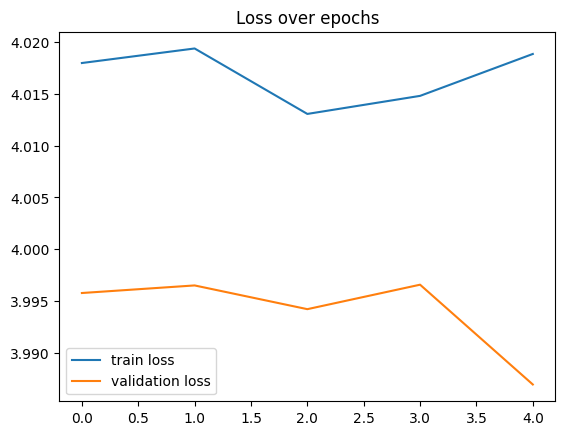

In [27]:
plt.plot(train_loss, label = 'train loss') # Changed train_losses to train_loss
plt.plot(val_losses, label = 'validation loss') # Changed val_losses to val_losses
plt.legend()
plt.title("Loss over epochs")
plt.show()

##Bonus: Evaluating the results

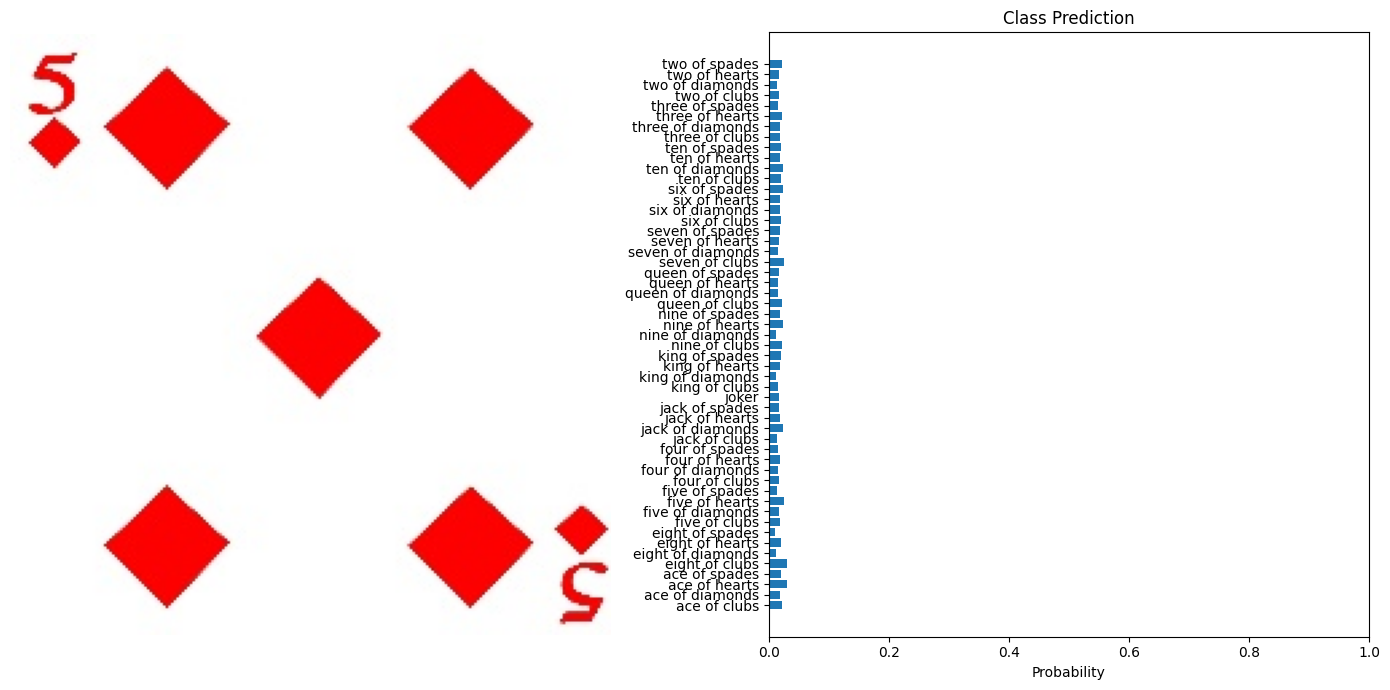

In [29]:
import torch
import torchvision.transforms as transforms
!pip install pillow # install pillow library which contains Image module
from PIL import Image # import Image from PIL library instead of PTL
import matplotlib.pyplot as plt
import numpy as np

#Load and preprocess the image
def preprocess_image(image_path, transform):
    image = Image.open(image_path).convert("RGB")
    return image, transform(image).unsqueeze(0)

#predict using the model
def predict(model, image_tensor, device):
  model.eval()
  with torch.no_grad():
    image_tensor = image_tensor.to(device)
    output = model(image_tensor)
    probabilities = torch.nn.functional.softmax(output, dim=1) # changed outputs to output
  return probabilities.cpu().numpy().flatten()

#Visualization
def visualization_predictions(original_image, probabilities, class_names):
  fig, axarr = plt.subplots(1, 2, figsize=(14,7))

  #Display image
  axarr[0].imshow(original_image)
  axarr[0].axis('off')

  #Display predictions
  axarr[1].barh(class_names, probabilities)
  axarr[1].set_xlabel('Probability')
  axarr[1].set_title('Class Prediction')
  axarr[1].set_xlim(0,1)

  plt.tight_layout()
  plt.show()


#Example usage
test_image = "/kaggle/input/cards-image-datasetclassification/test/five of diamonds/2.jpg"
# changed tarnsform to transform, it was a typo
transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor(),
])

original_image, image_tensor = preprocess_image(test_image, transform)
probabilities = predict(model, image_tensor, device)

#Assuming dataset.classes gives the class names
class_names = dataset.classes
visualization_predictions(original_image, probabilities, class_names)

In [35]:
from glob import glob
# Updated path to reflect the correct location within Kaggle
test_images = glob('/kaggle/input/cards-image-datasetclassification/test/*/*')
test_examples = np.random.choice(test_images, 10)

for example in test_examples:
  original_image, image_tensor = preprocess_image(example, transform)
  probabilities = predict(model, image_tensor, device)

  # Assuming dataset.classes gives the class names
  class_names = dataset.classes
  visualization_predictions(original_image, probabilities, class_names)

Output hidden; open in https://colab.research.google.com to view.